<div class="alert alert-info">
        
# Сборный проект

</div>

Описание данных:

- Name — название игры  
- Platform — платформа  
- Year_of_Release — год выпуска  
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


🧑‍🎓 Ира: в датасете почти 17тыс строк, довольно много, но есть большое кол-во пропусков в некоторых столбцах. Некотороые из них могут быть связаны с системной ошибкой при загрузке, а некоторые просто отсутствовать в принципе(такие как оценки игр).
Так же есть проблема с некорректными типами данных некоторых столбцов, таких как оценка пользователя, год выпуска игры

<div class="alert alert-info">
        
## Подготовка данных

</div>

In [4]:
games.rename(columns={"Name": "name", "Platform": "platform",
                  "Year_of_Release": "year_of_release", "Genre":"genre", "NA_sales":"na_sales", "EU_sales":"eu_sales",
                  "JP_sales":"jp_sales", "Other_sales":"other_sales", "Critic_Score":"critic_score",
                  "User_Score":"user_score", "Rating":"rating"}, inplace=True)

In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

🧑‍🎓 Ира: строки с пропусками в столбцах name и year_of_release думаю можно удалить, имя восстановить точно не получится, а поставить корректный год можно только если гуглить дату выхода каждой игры, но так как их почти 300, вряд ли это будет правильным решением. Данных с пропущенным годом не очень много, поэтому можно не оставлять.

Все остальное лучше оставить как есть, так как пропуски в оценке критиков и пользователей не совсем корректно заполнять средними, ведь непонятно, пропуск- это ноль или же какая-то незаполненная оценка. 
Но для дальнейшего преобразрования типа столбца заменим отсутствующие значения на условные 11 у пользоваталей и 101 у критиков

Со столбцом rating тоже самое, что и со столбцом year_of_release, но значений с пропусками очень много, почти 1/3 таблицы, их лучше оставить.

In [6]:
games = games.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [7]:
games.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [8]:
games.query('user_score != "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


🧑‍🎓 Ира: Судя по всему, tbd означает To Be Determined, то есть пользовательский рейтинг еще не определен, это странно учитывая, что есть игры с таким рейтингом от 1999.
Почему рейтинг не определен понять сложно, я проверяла по продажам в разных регионах, но закономерности нет, с жанром тоже связать отсутствие рейтинга не получается. 

Вероятнее всего игры или не оценивают, или была какая-то ошибка при загрузке данных, которая повлекла за собой "пропажу" пользовательского рейтинга.

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = '11'
games['user_score'] = games['user_score'].fillna('11')
games['critic_score'] = games['critic_score'].fillna('101')
games['rating'] = games['rating'].fillna('unknown')
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,101,11,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,101,11,unknown


In [10]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)
games['critic_score'] = games['critic_score'].astype(float)


In [11]:
games['all_sales'] = games['na_sales']  + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,unknown,31.38


<div class="alert alert-info">
        
## Исследовательский анализ данных

</div>

<div class="alert alert-info">
        
### Сколько игр выпускалось в разные годы

</div>

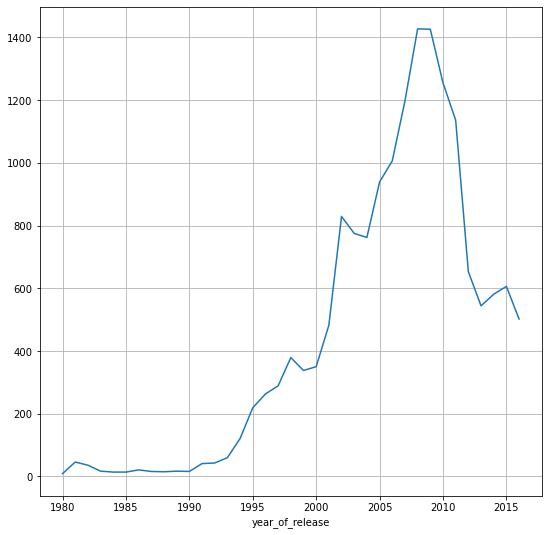

In [12]:
games.groupby('year_of_release')['year_of_release'].count().plot(x='year_of_release', figsize=(9,9), grid=True)
plt.show()

🧑‍🎓 Ира: На мой взгляд данные за периоды, где выпущено меньше 500 игр, не так важны, так как можно проследить, что кол-во игр за последние 15 лет(если мы сейчас в 2016) увеличивалось, и подавляющее большинство игр будет лежать в диапазоне этих лет.


<div class="alert alert-info">
        
### Как менялись продажи по платформам

</div>

In [13]:
df_platform = games[['platform', 'year_of_release', 'all_sales']]
df_platform = df_platform.query('year_of_release >= 2000').reset_index(drop=True)
df_platform_group = df_platform.groupby(['platform', 'year_of_release']).sum().reset_index()
df_platform_group.head(20)



,platform,year_of_release,all_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DC,2000,5.99
7,DC,2001,1.07
8,DC,2002,0.29
9,DC,2007,0.02


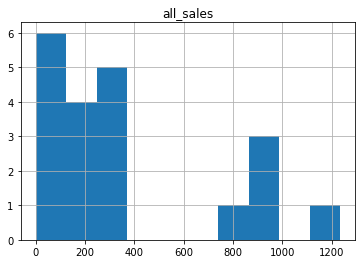

In [14]:
df_platform_sales = df_platform_group.groupby(['platform'])['all_sales'].sum().reset_index().sort_values(by='all_sales',
                                                                                     ascending=False)
df_platform_sales.hist()
plt.show()

🧑‍🎓 Ира: Здесь можно сказать, что основном продажи по платформам составляют 100-400 млн копий, хвост больше 600 можно отбросить, так как таких платформ совсем мало.

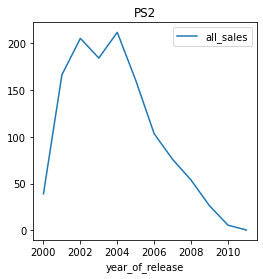

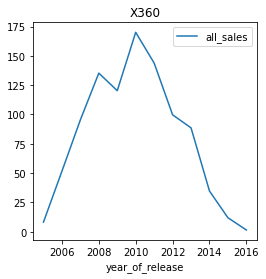

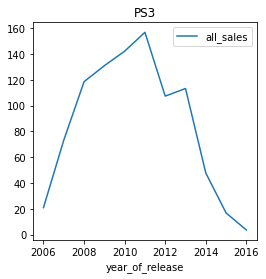

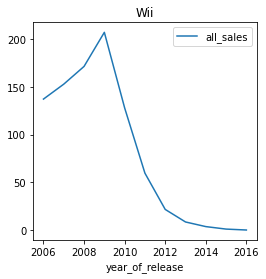

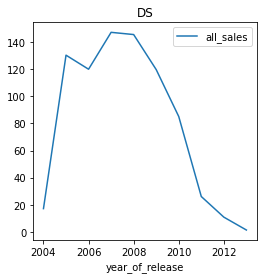

In [15]:
df_biggest_platform = df_platform_sales[df_platform_sales['all_sales'] > 600]

biggest_platform_names = df_biggest_platform['platform'].unique()
biggest_platform_years = df_platform_group.query('platform in @biggest_platform_names').reset_index(drop=True)

for row in biggest_platform_names:
    df_platform_group.query('platform == @row').plot(title=row, y='all_sales', 
                                                     x='year_of_release', figsize=(4,4))


🧑‍🎓 Ира: Можно предположить, что "наибольшие суммарные продажи" надо считать все, где all_sales > 600  
    Характерный срок входа-выхода платформ примерно 10 лет, это можно отследить на графикам продаж платформ PS, Wii, PS2

<div class="alert alert-info">
        
### Не учитывайте в работе данные за предыдущие годы

</div>

In [16]:
clear_data = games.query('year_of_release >= 2013').reset_index(drop=True)
clear_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,101.0,11.0,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<div class="alert alert-info">
        
### Какие платформы лидируют по продажам, растут или падают?

</div>


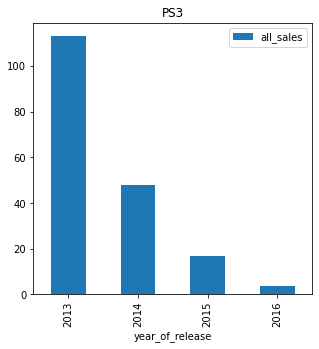

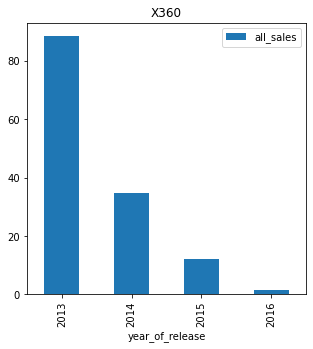

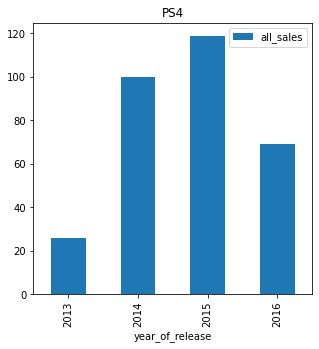

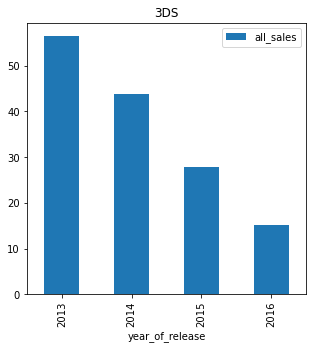

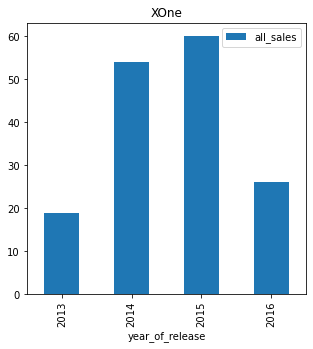

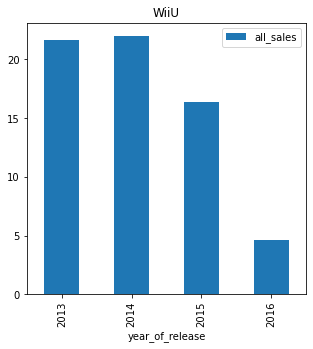

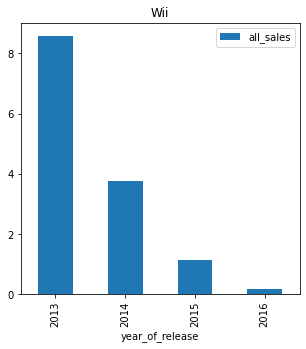

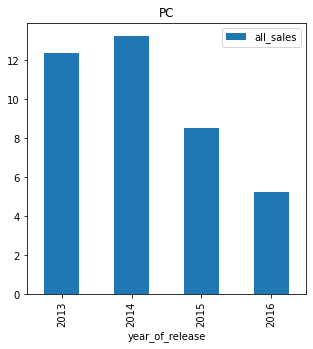

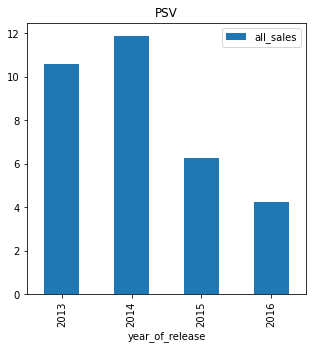

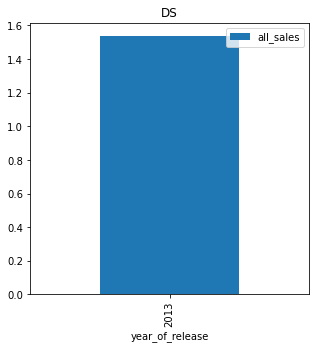

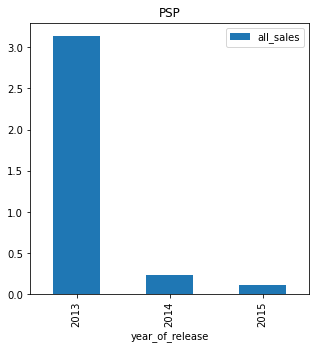

In [17]:
platform_list = clear_data['platform'].unique()
clear_data_platform = clear_data.groupby(['platform', 'year_of_release'])['all_sales'].sum().reset_index()
#clear_data_platform

for row in platform_list:
    clear_data_platform.query('platform == @row').plot(title=row, y='all_sales', 
                                                    x='year_of_release', figsize=(5,5), kind='bar')
    
    
    

🧑‍🎓 Ира: Рост показыыают такие платформы, как XOne, PS4
Падают же в свю очередь PC, 3DS, PS3, X360.
Некоторые платфорсы за этот период в принципе перестали продаваться, это может быть связано с обновлением платформ и заменой старых платформ обновленными(как с платформами PS)

In [18]:
platform_leader = clear_data_platform.groupby('platform')['all_sales'].sum().reset_index().sort_values(by='all_sales', ascending=False)
platform_leader.head(20)



,platform,all_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


🧑‍🎓 Ира: Если говорить за весь промежуток данных, то лидерами по продажам являются PS3, PS4 и XOne

In [19]:
platform_leader_2015 = clear_data_platform.query('year_of_release >= 2015').groupby('platform')['all_sales'].sum().reset_index().sort_values(by='all_sales', ascending=False)
platform_leader_2015.head(20)



,platform,all_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


🧑‍🎓 Ира: Если взять только 2015-2016 год, будет видно, что лидерами остались так же PS4 и XOne, PS4 вообще очень сильно оторвалась от конкурентов, что кстати может говорить о популярности платфомы, так как дата релиза PS4 и XOne - ноябрь 2013 года, то есть платофрмы вышли по сути в одно время, но PS4 заметно опережает по породажам конкурента

<div class="alert alert-info">
        
### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

</div>

(0.0, 2.0)

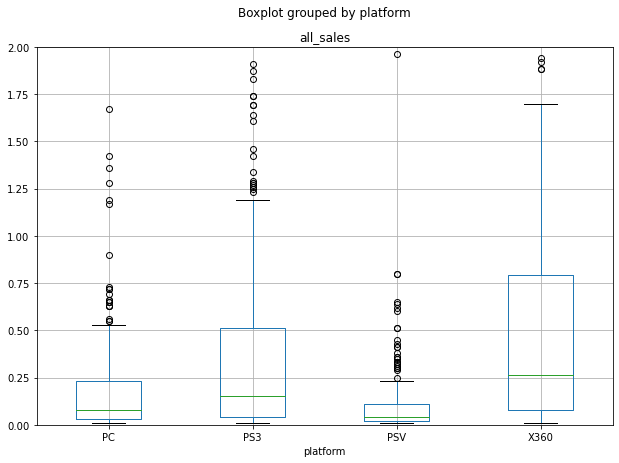

In [20]:
clear_data.query('platform in ("PS3", "X360", "PC", "PSV")').boxplot(column='all_sales', by='platform', figsize=(10,7)).set_ylim(0,2)




<div class="alert alert-info">
        
### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

</div>


Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.

In [21]:
ps3_data = clear_data.query('platform == "PS3" and critic_score != 101 and user_score != 11')[['critic_score', 'user_score',
                                                                                              'na_sales', 'eu_sales',
                                                                                               'jp_sales', 'other_sales']]



In [22]:
ps3_data.corr()

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.599920,0.334401,0.309752,0.297450,0.315898
user_score,0.599920,1.000000,0.008990,0.000013,0.215037,0.029920
na_sales,0.334401,0.008990,1.000000,0.897344,0.552684,0.931878
eu_sales,0.309752,0.000013,0.897344,1.000000,0.580055,0.986538
jp_sales,0.297450,0.215037,0.552684,0.580055,1.000000,0.577911
other_sales,0.315898,0.029920,0.931878,0.986538,0.577911,1.000000


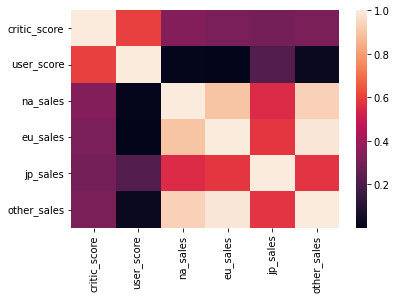

In [23]:
sns.heatmap(ps3_data.corr())
plt.show()

🧑‍🎓 Ира: Можно заметить, что оценка критиков достаточно сильно влияет на продажи игр в целом, однако если брать в разбивке по регионам, то оценка критиков с продажами игр в Японии имеет корреляцию всего 0.2, что не очень много на мой взгляд, но тенденция в любом случае очевидна: чем выше оценка критиков, тем лучше продаются игры.

Оценки пользователей практически никак не влияют на продажи, корреляции хоть и положительные, но очень маленькие.
Я могу предположить, что пользователи покупают игры как раз после их выхода и обзора критиков, а не смотрят на рейтинг таких же пользователей(либо его на момент покупки большинства пользователей еще нет). 

<div class="alert alert-info">
        
### Соотнесите выводы с продажами игр на других платформах


</div>

'PS4'

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.557654,0.414241,0.346044,0.322057,0.408465
user_score,0.557654,1.000000,-0.022577,-0.050671,0.174512,-0.037332
na_sales,0.414241,-0.022577,1.000000,0.714988,0.530480,0.915292
eu_sales,0.346044,-0.050671,0.714988,1.000000,0.519826,0.935136
jp_sales,0.322057,0.174512,0.530480,0.519826,1.000000,0.566734
other_sales,0.408465,-0.037332,0.915292,0.935136,0.566734,1.000000


'XOne'

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.472462,0.381859,0.373454,0.199978,0.404996
user_score,0.472462,1.000000,-0.094047,-0.075822,0.071915,-0.095963
na_sales,0.381859,-0.094047,1.000000,0.683604,0.400585,0.982840
eu_sales,0.373454,-0.075822,0.683604,1.000000,0.381617,0.804073
jp_sales,0.199978,0.071915,0.400585,0.381617,1.000000,0.419054
other_sales,0.404996,-0.095963,0.982840,0.804073,0.419054,1.000000


'3DS'

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.769536,0.352655,0.254784,0.284584,0.337180
user_score,0.769536,1.000000,0.280116,0.184515,0.247439,0.260898
na_sales,0.352655,0.280116,1.000000,0.884865,0.562605,0.988644
eu_sales,0.254784,0.184515,0.884865,1.000000,0.623985,0.940184
jp_sales,0.284584,0.247439,0.562605,0.623985,1.000000,0.593697
other_sales,0.337180,0.260898,0.988644,0.940184,0.593697,1.000000


'X360'

,critic_score,user_score,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.520946,0.342724,0.336418,0.290613,0.349204
user_score,0.520946,1.000000,-0.007707,-0.002450,0.074947,-0.012678
na_sales,0.342724,-0.007707,1.000000,0.880260,0.677719,0.982907
eu_sales,0.336418,-0.002450,0.880260,1.000000,0.651844,0.950823
jp_sales,0.290613,0.074947,0.677719,0.651844,1.000000,0.685470
other_sales,0.349204,-0.012678,0.982907,0.950823,0.685470,1.000000


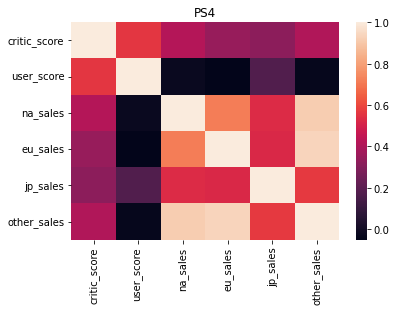

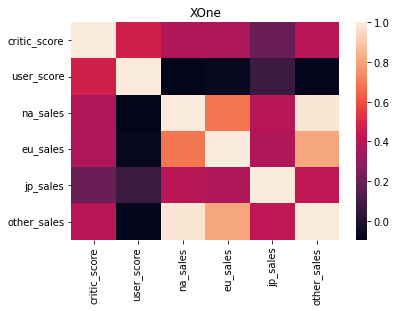

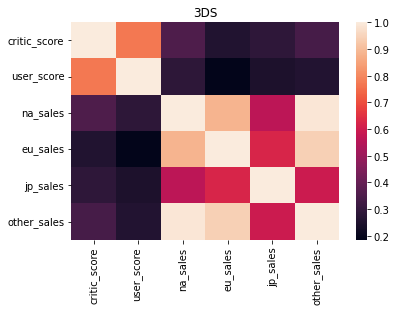

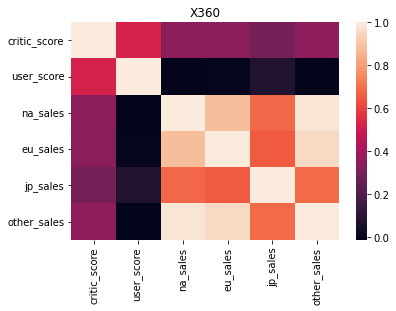

In [24]:

for row in platform_leader['platform'].head().unique():
    if row != 'PS3':

        row_data = clear_data.query('platform == @row and critic_score != 101 and user_score != 11')[['critic_score', 'user_score',
                                                                                              'na_sales', 'eu_sales',
                                                                                               'jp_sales', 'other_sales']]

        display(row, row_data.corr())
        plt.subplots(1, 1)
        plt.title(row)
        sns.heatmap(row_data.corr())

        
    

🧑‍🎓 Ира: нельзя сказать, что для платформ- лидеров продаж утверждение о взаимосвязи оценки критиков и продаж игр соответствует утверждению, которое было сделано для PS3.
Корреляция продаж с оценкой критиков у платформ PS4, X360 примерно равно 0,4, что ближе к корреляции PS3.
На мой взгляд это может быть связанно с популярностью этих платформ, так как PS и Xbox на слуху даже не у геймеров. 
То есть, чем популярнее платформа, тем охотнее ее берут на оценку критики, и тем охотнее от высокой оценки ее покупают пользователи. 

Что интересно- после изменения временного промежутка, за который смотрим данные, изменилась корреляция с пользовательскими оценками, они стали отрицательными, то все еще остаются очень маленькими, так же как и в случае с PS3

<div class="alert alert-info">
        
### Общее распределение игр по жанрам

</div>

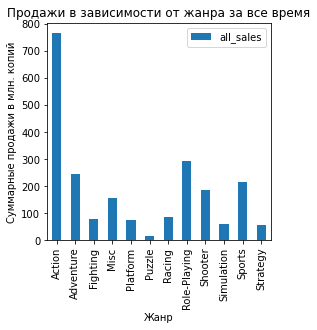

In [25]:
df_genre_count = clear_data.groupby(['genre'])['all_sales'].count().reset_index()
df_genre_count.head()
df_genre_count.plot(title='Продажи в зависимости от жанра за все время',
                    y='all_sales', x='genre', figsize=(4,4), kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи в млн. копий')
plt.show()

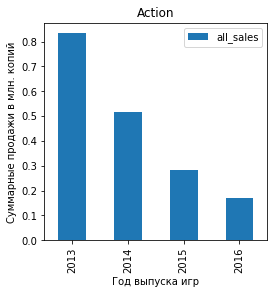

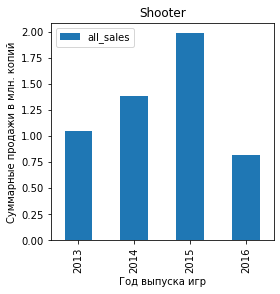

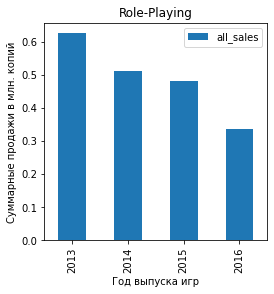

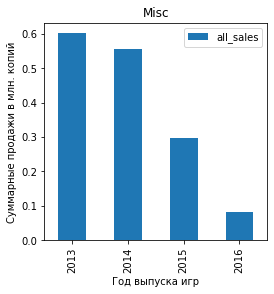

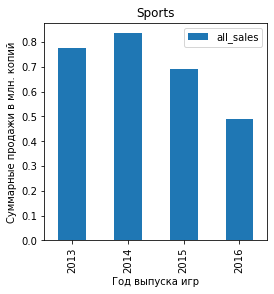

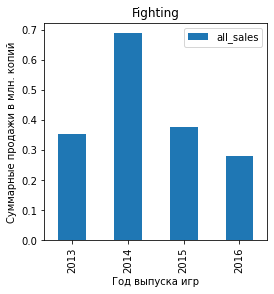

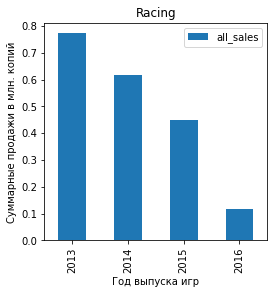

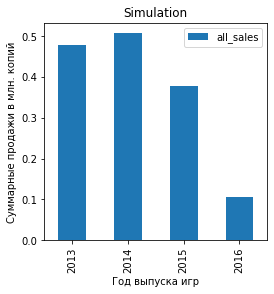

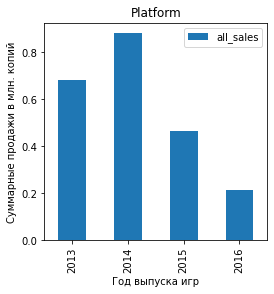

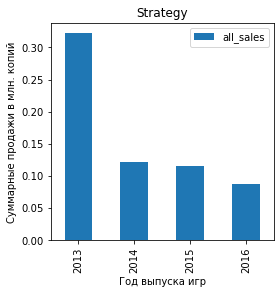

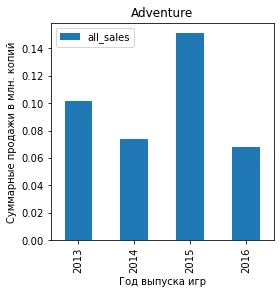

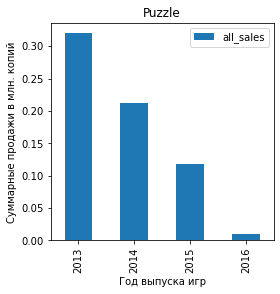

In [26]:
genre_names = clear_data['genre'].unique()
df_genre = clear_data.groupby(['genre', 'year_of_release'])['all_sales'].mean().reset_index()

for row in genre_names:

    df_genre.query('genre == @row').plot(title=row, y='all_sales', 
                                                     x='year_of_release', figsize=(4,4), kind='bar')
    plt.xlabel('Год выпуска игр')
    plt.ylabel('Суммарные продажи в млн. копий')

🧑‍🎓 Ира: Самый прибыльный жанр - Shooter.
    Есть жанры, которые со временем теряют свою популярность, их продажи падают(например жанр Racing, Puzzle)
    Есть жанры, которые показывают стабильные продажи каждый год, хоть и небольшие, например как жанр Role-Plaing

<div class="alert alert-info">
        
## Портрет пользователя каждого региона

</div>

In [27]:
def popular_region(df, group, var_column, group_desc, column_desc):
    if group == 'platform':
        popular_region = df.groupby([group])[[var_column, 'all_sales']].sum().reset_index()
        popular_region[var_column] = (popular_region[var_column] / popular_region['all_sales'])
        popular_region = popular_region.drop(['all_sales'], axis=1)
    elif group == 'genre':
        popular_region = df.groupby([group])[var_column].sum().reset_index()
    else:
        popular_region = df.groupby([group])[var_column].sum().reset_index()
    
    popular_region = popular_region.sort_values(by=var_column, ascending=False).head()

    print('Топ-5 категории', group_desc, 'для региона', column_desc)
    popular_region.plot(x=group, y=var_column, kind='bar')
    
    


Топ-5 категории Платформа для региона NA


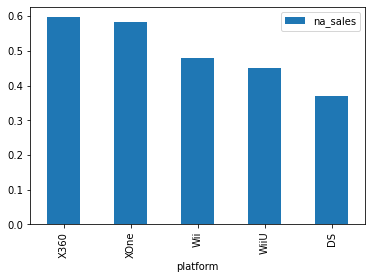

In [28]:
df = clear_data
group = 'platform'
var_column = 'na_sales'
group_desc = 'Платформа'
column_desc = 'NA'

popular_region(df, group, var_column, group_desc, column_desc)

🧑‍🎓 Ира: Доли продаж друг от друга отличаются несильно, но видно, что лидером по продажам в регионе Северной Америки является Xbox.

Топ-5 категории Жанр для региона NA


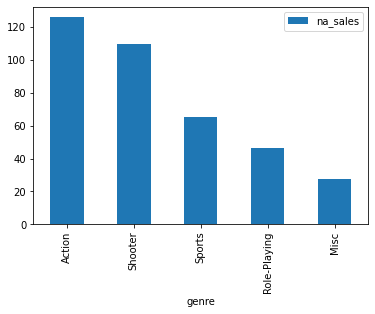

In [29]:
df = clear_data
group = 'genre'
var_column = 'na_sales'
group_desc = 'Жанр'
column_desc = 'NA'

popular_region(df, group, var_column, group_desc, column_desc)

Топ-5 категории Платформа для региона EU


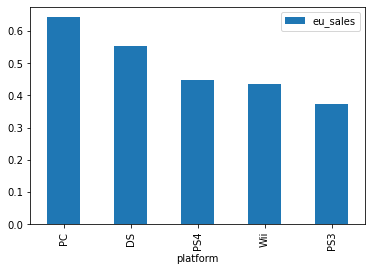

In [30]:
df = clear_data
group = 'platform'
var_column = 'eu_sales'
group_desc = 'Платформа'
column_desc = 'EU'

popular_region(df, group, var_column, group_desc, column_desc)

🧑‍🎓 Ира: В регионе EU разница тоже не особо есть, но видно, что здесь люди предпочитают играть на ПК

Топ-5 категории Жанр для региона EU


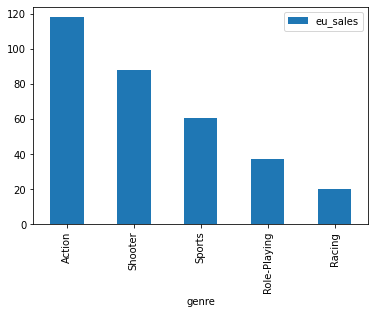

In [31]:
df = clear_data
group = 'genre'
var_column = 'eu_sales'
group_desc = 'Жанр'
column_desc = 'EU'

popular_region(df, group, var_column, group_desc, column_desc)

Топ-5 категории Платформа для региона JP


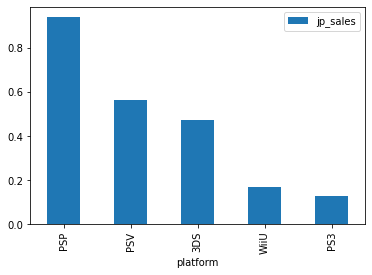

In [32]:
df = clear_data
group = 'platform'
var_column = 'jp_sales'
group_desc = 'Платформа'
column_desc = 'JP'

popular_region(df, group, var_column, group_desc, column_desc)

🧑‍🎓 Ира: У Японии разница между платформами самая ощутимая, лидерами продаж так же являются платформы Sony. Кстати, насколько я поняла, все эти платформы портативные, это даже неудивительно, учитывая, что Японцы очень трудолюбивые, и скорее всего играют по пути на работу/с работы

Топ-5 категории Жанр для региона JP


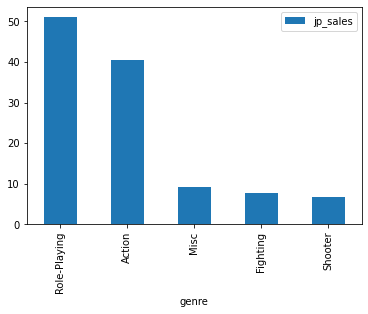

In [33]:
df = clear_data
group = 'genre'
var_column = 'jp_sales'
group_desc = 'Жанр'
column_desc = 'JP'

popular_region(df, group, var_column, group_desc, column_desc)

🧑‍🎓 Ира: Разницы в жанрах игр практически нет, у регионов Семерной Америки и Европы они почти 1в1, у Японии список немного меняется, лидерство берет на себя жанр Role-Playing

Топ-5 категории Рейтинг для региона NA


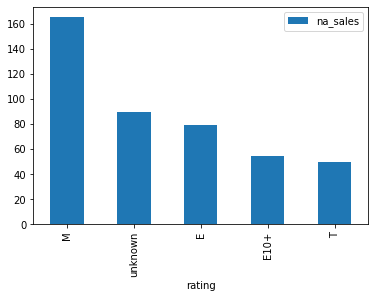

In [34]:
df = clear_data
group = 'rating'
var_column = 'na_sales'
group_desc = 'Рейтинг'
column_desc = 'NA'

popular_region(df, group, var_column, group_desc, column_desc)

Топ-5 категории Рейтинг для региона EU


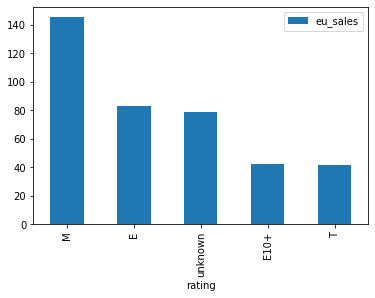

In [35]:
df = clear_data
group = 'rating'
var_column = 'eu_sales'
group_desc = 'Рейтинг'
column_desc = 'EU'

popular_region(df, group, var_column, group_desc, column_desc)

Топ-5 категории Рейтинг для региона JP


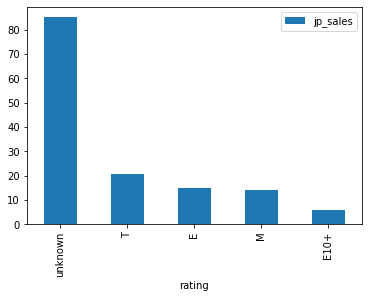

In [36]:
df = clear_data
group = 'rating'
var_column = 'jp_sales'
group_desc = 'Рейтинг'
column_desc = 'JP'

popular_region(df, group, var_column, group_desc, column_desc)

🧑‍🎓 Ира: Рейтинг в регионах Северной Америки а Европы не сильно отличается, хотя в топ 5 вошли игры с неопределенным рейтингом.
В свою очередь в Японии игры с неопределенным рейтингом лидируют по продажам, и есть небольшое различие в расстановке рейтинга в топе. 

Можно предположить, что рейтинг не сильно вияет на продажи игр, либо это зависит от платформы, либо пользователи при отсутствии рейтинга смотрят на другие характеристики(может на описание игры).

Интересно конечно, что японйы предпочитают игры без рейтинга, может это какие-то игры 18+, которые скрывают свой рейтинг, или супер непопулярные игры...

<div class="alert alert-info">
        
## Проверка гипотез

</div>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

In [37]:
alpha = .05

<div class="alert alert-info">
        
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

</div>


Для начала сформулируем нулевую и альтернативную гипотезы:

Нулевая: Средние пользовательские оценки игр для платформ Xbox One и PC равны   
Альтернативная: Средние пользовательские оценки игр для платформ Xbox One и PC НЕ равны 

In [38]:
xone_data = clear_data.query('platform == "XOne"')
PC_data = clear_data.query('platform == "PC"')
print( PC_data.shape, xone_data.shape)

(189, 12) (247, 12)


🧑‍🎓 Ира: Будем пользоваться т-тестом, так как у нас не генеральные совокупности, а лишь выборки

In [39]:
rating_results = st.ttest_ind(
    xone_data['user_score'], 
    PC_data['user_score'],
    equal_var = False) #так как выборки разного размера

print('p-значение:', rating_results.pvalue)

if rating_results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.011609441285331012
Отвергаем нулевую гипотезу


<div class="alert alert-info">
        
### Средние пользовательские рейтинги жанров Action и Sports разные.

</div>


Сформулируем нулевую и альтернативную гипотезы:

Нулевая: Средние пользовательские оценки игр для жанров Action и Sports равны   
Альтернативная: Средние пользовательские оценки игр для жанров Action и Sports НЕ равны 


In [40]:
action_data = clear_data.query('genre == "Action"')
sport_data = clear_data.query('genre == "Sports"')
print( action_data.shape, sport_data.shape)

(766, 12) (214, 12)


In [41]:
genre_results = st.ttest_ind(
    action_data['user_score'], 
    sport_data['user_score'],
    equal_var = False) #так как выборки разного размера

print('p-значение:', genre_results.pvalue)

if genre_results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0957337060814841e-20
Отвергаем нулевую гипотезу


🧑‍🎓 Ира: Так как нулевая гипотеза отвергается, то можно сказать, что средние пользовательские рейтинги жанров Action и Sports действительно разные
    

<div class="alert alert-info">
        
## Общий вывод

</div>

Были проанализированы данные по различным метрикам игр, вышедшим на разных платформах за несколько лет.
Из данных удалены пустые значения, изменены типы данных в нескольких столбцах, посчитана выручка по всем регионам для каждой игры.

Так же была исследована динамика продаж по нескольким платформам и жанрам в зависимости в от года выхода игр. 
Замечена тенденция, что платформы в основном "выходят" из пользования примерно за 10 лет. 

Так же были проанализированы зависимости продаж игр от оценки критиков и пользователей. 

Кроме того, были выдвинуты 2 гипотезы о равенстве средних.


В целом можно сказать, что регион Северной Америки не сильно отличается от региона Европы по используемым жанрам игр, но отличается в предпочтении разных платформ. 
Япония же в свою очередь отличается и жанрами, и платформами, используемыми пользователями. 

Вывод для дальнейщего прогноза: стоит обратить внимание на игры, выпускаемые для платформ XOne, PS46, PSP, PC, так как это самые популярные платформы по разным регионам, касательно жанра различные шутеры, а так же на игры жанра экшн, они входят в топ-5 игр по каждому региону. 

Отдельно по каждому региону можно сказать, что в Северной Америке и Европе стоит продавать игры на PC, Xbox и Sony, отдавая. предпочтения шутерам, экшну и играм-ролевкам. 
Для Японии можно сделать такой же вывод, только продавать больше игры для PSP и других портативных платформ, по жанрам можно оставить все так же, как в Европе и Америке
